# A/B Test Challenge



---

#### What is an A/B Test? 

It is a decision making support & research methodology that allow you to measure an impact of a change in a product (e.g.: a digital product). For this challenge you will analyse the data resulting of an A/B test performed on a digital product where a new set of sponsored ads are included.


#### Measure of success

Metrics are need it to measure the success of your product. They are typically split in the following categories: 

- __Enganged based metrics:__ number of users, number of downloads, number of active users, user retention, etc.

- __Revenue and monetization metrics:__ ads and affiliate links, subscription-based, in-app purchases, etc.

- __Technical metrics:__ service level indicators (uptime of the app, downtime of the app, latency).



---

## Metrics understanding

In this part you must analyse the metrics involved in the test. We will focus in the following metrics:

- Activity level + Daily active users (DAU).

- Click-through rate (CTR)

### Activity level

In the following part you must perform every calculation you consider necessary in order to answer the following questions:

- How many activity levels you can find in the dataset (Activity level of zero means no activity).

- What is the amount of users for each activity level.

- How many activity levels do you have per day and how many records per each activity level.

At the end of this section you must provide your conclusions about the _activity level_ of the users.

__Dataset:__ `activity_pretest.csv`

In [2]:
# your-code
import pandas as pd
import numpy as np
from scipy.stats import trim_mean
from statsmodels import robust      
import wquantiles
from statsmodels.stats.weightstats import ztest
from scipy.stats import ttest_ind
from scipy import stats

import seaborn as sns
import matplotlib.pylab as plt
import functools as ft



In [2]:
data_1 = pd.read_csv("./data/activity_pretest.csv", keep_default_na=False, na_values=[""])
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1860000 entries, 0 to 1859999
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   userid          object
 1   dt              object
 2   activity_level  int64 
dtypes: int64(1), object(2)
memory usage: 42.6+ MB


In [3]:
data_1["userid"].unique

<bound method Series.unique of 0          a5b70ae7-f07c-4773-9df4-ce112bc9dc48
1          d2646662-269f-49de-aab1-8776afced9a3
2          c4d1cfa8-283d-49ad-a894-90aedc39c798
3          6889f87f-5356-4904-a35a-6ea5020011db
4          dbee604c-474a-4c9d-b013-508e5a0e3059
                           ...                 
1859995    200d65e6-b1ce-4a47-8c2b-946db5c5a3a0
1859996    535dafe4-de7c-4b56-acf6-aa94f21653bc
1859997    0428ca3c-e666-4ef4-8588-3a2af904a123
1859998    a8cd1579-44d4-48b3-b3d6-47ae5197dbc6
1859999    bac5da9e-ef79-4ae9-9efe-cd6eca093db2
Name: userid, Length: 1860000, dtype: object>

In [4]:
#What is the amount of users for each activity level
data_1.groupby(["dt","activity_level"])["userid"].count().reset_index()


,dt,activity_level,userid
0,2021-10-01,0,29366
1,2021-10-01,1,1602
2,2021-10-01,2,1507
3,2021-10-01,3,1587
4,2021-10-01,4,1551
...,...,...,...
646,2021-10-31,16,1499
647,2021-10-31,17,1534
648,2021-10-31,18,1531
649,2021-10-31,19,1616


In [5]:
#How many activity levels do you have per day and how many records per each activity level.


In [6]:
data_1.describe()

,activity_level
count,1.860000e+06
mean,5.243289e+00
std,6.520996e+00
min,0.000000e+00
25%,0.000000e+00
50%,1.000000e+00
75%,1.000000e+01
max,2.000000e+01


In [7]:
#How many activity levels do you have per day and how many records per each activity level.

data_2 = data_1.groupby("dt")["userid"].count().reset_index()
data_2

,dt,userid
0,2021-10-01,60000
1,2021-10-02,60000
2,2021-10-03,60000
3,2021-10-04,60000
4,2021-10-05,60000
5,2021-10-06,60000
6,2021-10-07,60000
7,2021-10-08,60000
8,2021-10-09,60000
9,2021-10-10,60000


In [8]:
#records per each activity level.

data_3 = pd.DataFrame(data_1.groupby("activity_level")["activity_level"].count())
data_3

,activity_level
activity_level,
0,909125
1,48732
2,49074
3,48659
4,48556
5,49227
6,48901
7,48339
8,48396


In [9]:
percentages = [0.05, 0.25, 0.5, 0.75, 0.95]
percentiles = data_1["activity_level"].quantile(percentages)
df = pd.DataFrame(percentiles)
df.index = [f'{p * 100}%' for p in percentages]
df.transpose()

,5.0%,25.0%,50.0%,75.0%,95.0%
activity_level,0.0,0.0,1.0,10.0,18.0


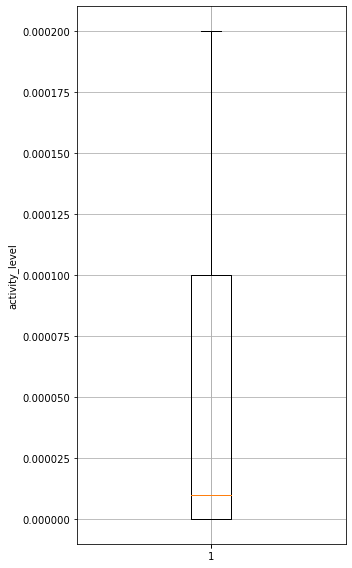

In [10]:
data = data_1['activity_level'] / 100_000
ax = data.plot.box(figsize=(5, 8))
ax.set_ylabel('activity_level')
ax.boxplot(data, whis=[0, 100])
plt.tight_layout()
plt.grid()
plt.show()

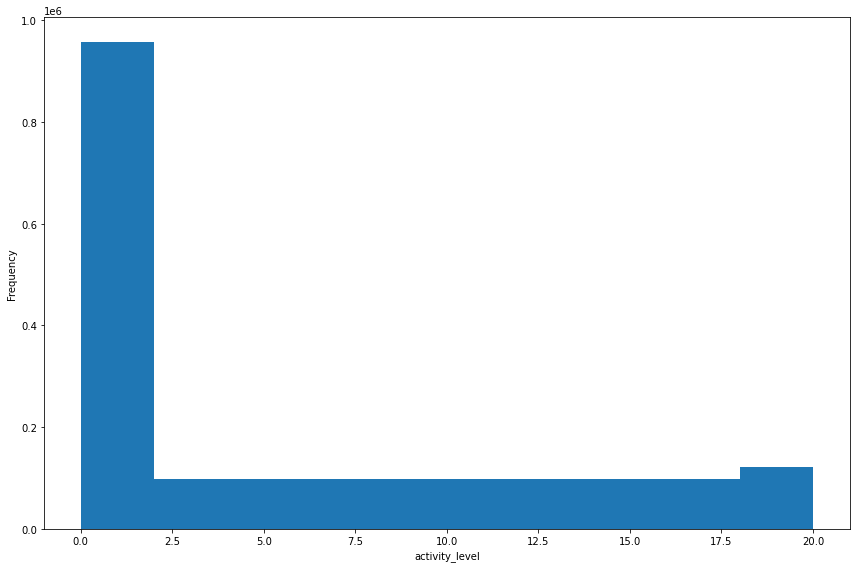

In [11]:
data = data_1["activity_level"] / 100_000
data = data_1["activity_level"]
ax = data.plot.hist(figsize=(12, 8))
ax.set_xlabel("activity_level")
plt.tight_layout()

### Daily active users (DAU)

![ab_test](./img/user_activity_ab_testinG.JPG)


The daily active users (DAU) refers to the amount of users that are active per day (activity level of zero means no activity). You must perform the calculation of this metric and provide your insights about it.

__Dataset:__ `activity_pretest.csv`

In [12]:
# your-code

data_pret = data_1.loc[(data_1["activity_level"] > 0)]
data_pret

,userid,dt,activity_level
909125,428070b0-083e-4c0e-8444-47bf91e99fff,2021-10-01,1
909126,93370f9c-56ef-437f-99ff-cb7c092d08a7,2021-10-01,1
909127,0fb7120a-53cf-4a51-8b52-bf07b8659bd6,2021-10-01,1
909128,ce64a9d8-07d9-4dca-908d-5e1e4568003d,2021-10-01,1
909129,e08332f0-3a5c-4ed2-b957-87e464e89b97,2021-10-01,1
...,...,...,...
1859995,200d65e6-b1ce-4a47-8c2b-946db5c5a3a0,2021-10-31,20
1859996,535dafe4-de7c-4b56-acf6-aa94f21653bc,2021-10-31,20
1859997,0428ca3c-e666-4ef4-8588-3a2af904a123,2021-10-31,20
1859998,a8cd1579-44d4-48b3-b3d6-47ae5197dbc6,2021-10-31,20


In [13]:
data_pret.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 950875 entries, 909125 to 1859999
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   userid          950875 non-null  object
 1   dt              950875 non-null  object
 2   activity_level  950875 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 29.0+ MB


In [14]:
data_pret.describe()

,activity_level
count,950875.000000
mean,10.256362
std,5.635938
min,1.000000
25%,5.000000
50%,10.000000
75%,15.000000
max,20.000000


In [15]:
#media y mediana similares
data_pret["activity_level"].median()

10.0

In [16]:
# num de usuarios por nivel de actividad y por fecha
data_count = data_pret.groupby(["dt","activity_level"])["userid"].count().reset_index()
#data_count_e = data_count.loc[data_count["dt"]=="2021-10-01"]
#data_count_e["userid"].sum()
data_count.sort_values(by="dt")

,dt,activity_level,userid
0,2021-10-01,1,1602
19,2021-10-01,20,769
18,2021-10-01,19,1572
17,2021-10-01,18,1597
16,2021-10-01,17,1593
...,...,...,...
601,2021-10-31,2,1585
600,2021-10-31,1,1566
618,2021-10-31,19,1616
608,2021-10-31,9,1600


In [17]:
print(data_count.sort_values(by="dt").max())
print(data_count.sort_values(by="dt").min())

dt                2021-10-31
activity_level            20
userid                  1686
dtype: object
dt                2021-10-01
activity_level             1
userid                   738
dtype: object


In [18]:
#número de usuarios por fechas

data_pret.groupby("dt")["userid"].count().reset_index()

,dt,userid
0,2021-10-01,30634
1,2021-10-02,30775
2,2021-10-03,30785
3,2021-10-04,30599
4,2021-10-05,30588
5,2021-10-06,30639
6,2021-10-07,30637
7,2021-10-08,30600
8,2021-10-09,30902
9,2021-10-10,30581


In [19]:
# media de usuarios por día- muy similar en todos los días

data_count.groupby(["dt"])["userid"].mean().reset_index()

,dt,userid
0,2021-10-01,1531.70
1,2021-10-02,1538.75
2,2021-10-03,1539.25
3,2021-10-04,1529.95
4,2021-10-05,1529.40
5,2021-10-06,1531.95
6,2021-10-07,1531.85
7,2021-10-08,1530.00
8,2021-10-09,1545.10
9,2021-10-10,1529.05


In [20]:
data_pret.groupby("dt")["userid"].count().reset_index()

,dt,userid
0,2021-10-01,30634
1,2021-10-02,30775
2,2021-10-03,30785
3,2021-10-04,30599
4,2021-10-05,30588
5,2021-10-06,30639
6,2021-10-07,30637
7,2021-10-08,30600
8,2021-10-09,30902
9,2021-10-10,30581


### Click-through rate (CTR)

![ab_test](./img/ad_click_through_rate_ab_testing.JPG)

Click-through rate (CTR) refers to the percentage of clicks that the user perform from the total amount ads showed to that user during a certain day. You must perform the analysis of this metric (e.g.: average CTR per day) and provide your insights about it.

__Dataset:__ `ctr_pretest.csv`

In [21]:
# your-code

data_ctr = pd.read_csv("./data/ctr_pretest.csv")
data_ctr

,userid,dt,ctr
0,4b328144-df4b-47b1-a804-09834942dce0,2021-10-01,34.28
1,34ace777-5e9d-40b3-a859-4145d0c35c8d,2021-10-01,34.67
2,8028cccf-19c3-4c0e-b5b2-e707e15d2d83,2021-10-01,34.77
3,652b3c9c-5e29-4bf0-9373-924687b1567e,2021-10-01,35.42
4,45b57434-4666-4b57-9798-35489dc1092a,2021-10-01,35.04
...,...,...,...
950870,a09a3687-b71a-4a67-b1ef-9b05c9770c4c,2021-10-31,32.33
950871,c843a595-b94c-42e1-b2fe-ec096070681e,2021-10-31,30.09
950872,edcdf0c1-3d8f-47e8-b7dd-05505749eb69,2021-10-31,35.71
950873,76b7a9ae-98fa-4c77-869d-594a4ef7282d,2021-10-31,34.76


In [22]:
data_ctr["userid"].unique

<bound method Series.unique of 0         4b328144-df4b-47b1-a804-09834942dce0
1         34ace777-5e9d-40b3-a859-4145d0c35c8d
2         8028cccf-19c3-4c0e-b5b2-e707e15d2d83
3         652b3c9c-5e29-4bf0-9373-924687b1567e
4         45b57434-4666-4b57-9798-35489dc1092a
                          ...                 
950870    a09a3687-b71a-4a67-b1ef-9b05c9770c4c
950871    c843a595-b94c-42e1-b2fe-ec096070681e
950872    edcdf0c1-3d8f-47e8-b7dd-05505749eb69
950873    76b7a9ae-98fa-4c77-869d-594a4ef7282d
950874    d522dfe0-63f2-40be-abf4-89221db6fa35
Name: userid, Length: 950875, dtype: object>

In [23]:
data_ctr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950875 entries, 0 to 950874
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   userid  950875 non-null  object 
 1   dt      950875 non-null  object 
 2   ctr     950875 non-null  float64
dtypes: float64(1), object(2)
memory usage: 21.8+ MB


In [24]:
data_ctr.describe()

,ctr
count,950875.000000
mean,33.000242
std,1.731677
min,30.000000
25%,31.500000
50%,33.000000
75%,34.500000
max,36.000000


In [25]:
#mean and median are equal
data_ctr["ctr"].median()

33.0

In [26]:
#número de userid que agrupados por ctr y fecha
ctr_num = data_ctr.groupby(["dt","ctr"])["userid"].count().reset_index()
ctr_num

,dt,ctr,userid
0,2021-10-01,30.00,25
1,2021-10-01,30.01,56
2,2021-10-01,30.02,58
3,2021-10-01,30.03,60
4,2021-10-01,30.04,56
...,...,...,...
18626,2021-10-31,35.96,60
18627,2021-10-31,35.97,49
18628,2021-10-31,35.98,56
18629,2021-10-31,35.99,50


In [27]:
# media de ctr por fecha y usuario  
ctr_mean = ctr_num.groupby(["dt","userid"])["ctr"].mean().reset_index()
ctr_mean.sort_values(by="dt")

,dt,userid,ctr
0,2021-10-01,25,30.000000
24,2021-10-01,54,32.730000
25,2021-10-01,55,32.987500
26,2021-10-01,56,32.924545
27,2021-10-01,57,33.543000
...,...,...,...
1269,2021-10-31,48,33.006857
1270,2021-10-31,49,33.138077
1271,2021-10-31,50,32.931463
1261,2021-10-31,40,33.351111


---

## Pretest metrics 

In this section you will perform the analysis of the metrics using the dataset that includes the result for the test and control groups, but only for the pretest data (i.e.: prior to November 1st, 2021). You must provide insights about the metrics (__Activity level__, __DAU__ and __CTR__) and also perform an hyphotesis test in order to determine whether there is any statistical significant difference between the groups prior to the start of the experiment. You must try different approaches (i.e.: __z-test__ and __t-test__) and compare the results.


__Datasets:__ `activity_all.csv`, `ctr_all.csv`

In [80]:
# your-code

ctr_metrics = pd.read_csv("./data/ctr_all.csv")
all_metrics = pd.read_csv("./data/activity_all.csv")


In [81]:
print(ctr_metrics.info())
print(all_metrics.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2303408 entries, 0 to 2303407
Data columns (total 4 columns):
 #   Column   Dtype  
---  ------   -----  
 0   userid   object 
 1   dt       object 
 2   groupid  int64  
 3   ctr      float64
dtypes: float64(1), int64(1), object(2)
memory usage: 70.3+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3660000 entries, 0 to 3659999
Data columns (total 4 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   userid          object
 1   dt              object
 2   groupid         int64 
 3   activity_level  int64 
dtypes: int64(2), object(2)
memory usage: 111.7+ MB
None


In [82]:
print("ctr_metrics:",ctr_metrics.isnull().sum())
print("-------------------------------------------")
print("all_metrics:", all_metrics.isnull().sum())

ctr_metrics: userid     0
dt         0
groupid    0
ctr        0
dtype: int64
-------------------------------------------
all_metrics: userid            0
dt                0
groupid           0
activity_level    0
dtype: int64


In [83]:
all_metrics["dt"]

0          2021-10-01
1          2021-10-01
2          2021-10-01
3          2021-10-01
4          2021-10-01
              ...    
3659995    2021-11-30
3659996    2021-11-30
3659997    2021-11-30
3659998    2021-11-30
3659999    2021-11-30
Name: dt, Length: 3660000, dtype: object

In [84]:
ctr_metrics["dt"]

0          2021-11-13
1          2021-11-13
2          2021-11-13
3          2021-11-13
4          2021-11-13
              ...    
2303403    2021-11-12
2303404    2021-11-12
2303405    2021-11-12
2303406    2021-11-12
2303407    2021-11-12
Name: dt, Length: 2303408, dtype: object

In [85]:
ctr_ft = ctr_metrics.loc[ctr_metrics["dt"]< "2021-11-01"]
ctr_ft.count()

userid     950875
dt         950875
groupid    950875
ctr        950875
dtype: int64

In [86]:
#sacamos solo el groupid 1
ctr_one = ctr_ft.loc[ctr_ft["groupid"] > 0]
ctr_one.count()

userid     475928
dt         475928
groupid    475928
ctr        475928
dtype: int64

In [87]:
print(ctr_one["dt"].unique())
print(ctr_one["groupid"].unique())


['2021-10-01' '2021-10-02' '2021-10-03' '2021-10-04' '2021-10-05'
 '2021-10-06' '2021-10-07' '2021-10-08' '2021-10-09' '2021-10-10'
 '2021-10-11' '2021-10-12' '2021-10-13' '2021-10-14' '2021-10-15'
 '2021-10-16' '2021-10-17' '2021-10-18' '2021-10-19' '2021-10-20'
 '2021-10-21' '2021-10-22' '2021-10-23' '2021-10-24' '2021-10-25'
 '2021-10-26' '2021-10-27' '2021-10-28' '2021-10-29' '2021-10-30'
 '2021-10-31']
[1]


In [88]:
ctr_one.head(10)

,userid,dt,groupid,ctr
824040,381e40b0-5529-4bc6-a3f6-6a687c7cde66,2021-10-01,1,31.27
824041,1797453f-f558-42f6-9a2f-55b95dd37e71,2021-10-01,1,32.18
824042,f8efefba-4782-4104-8fbf-7f4381dfb6d6,2021-10-01,1,31.20
824043,8a18c870-b2e2-4a47-9b30-0859f5854dcc,2021-10-01,1,31.19
824044,d472fbc3-d580-49f7-9ba4-ef002cc80606,2021-10-01,1,35.62
824045,410cd496-3651-4517-8452-8674cdd03081,2021-10-01,1,35.33
824046,6629849c-3164-4dd3-b102-af8a6d20abfb,2021-10-01,1,31.66
824047,e115af1e-4b0e-4257-9308-8180be22044a,2021-10-01,1,30.06
824048,804e0453-2128-4cab-b8e4-0134991c3230,2021-10-01,1,33.72
824049,6d3a3aa4-2c75-4a48-b664-690c148f0ca8,2021-10-01,1,35.86


In [89]:
ctr_one.describe()

,groupid,ctr
count,475928.0,475928.000000
mean,1.0,32.999572
std,0.0,1.729657
min,1.0,30.000000
25%,1.0,31.500000
50%,1.0,33.000000
75%,1.0,34.500000
max,1.0,36.000000


In [90]:
ctr_zero = ctr_ft.loc[ctr_ft["groupid"] == 0]
ctr_zero.count()

userid     474947
dt         474947
groupid    474947
ctr        474947
dtype: int64

In [91]:
print(ctr_zero["dt"].unique())
print(ctr_zero["groupid"].unique())

['2021-10-01' '2021-10-02' '2021-10-03' '2021-10-04' '2021-10-05'
 '2021-10-06' '2021-10-07' '2021-10-08' '2021-10-09' '2021-10-10'
 '2021-10-11' '2021-10-12' '2021-10-13' '2021-10-14' '2021-10-15'
 '2021-10-16' '2021-10-17' '2021-10-18' '2021-10-19' '2021-10-20'
 '2021-10-21' '2021-10-22' '2021-10-23' '2021-10-24' '2021-10-25'
 '2021-10-26' '2021-10-27' '2021-10-28' '2021-10-29' '2021-10-30'
 '2021-10-31']
[0]


In [92]:
ctr_zero.describe()

,groupid,ctr
count,474947.0,474947.000000
mean,0.0,33.000913
std,0.0,1.733700
min,0.0,30.000000
25%,0.0,31.500000
50%,0.0,33.000000
75%,0.0,34.500000
max,0.0,36.000000


In [93]:
# H0 = mean ctr with groupid 1 is equal than mean of ctr with groupid 0
# H1 != mean ctr with groupid 1 is different than mean of ctr with groupid 0

mean_0 = ctr_zero["ctr"].mean()
mean_1 = ctr_one["ctr"].mean()

# si alpha< p-value --> aceptar H0

        
# Z-test (the probability that the sample mean is not within the 95% of the population mean)

Z_score, p_value = ztest(ctr_one["ctr"], ctr_zero["ctr"], value=0)

print("mean groupid 1:", mean_1)
print("mean groupid 0:", mean_0)
print(f'Z_score: {Z_score}', f'\np-value: {p_value}')

#Aceptamos la H0, las medias son iguales

mean groupid 1: 32.99957172093207
mean groupid 0: 33.0009127755312
Z_score: -0.3775817380268587 
p-value: 0.7057413330705573


In [95]:
#t-test
# H0 = mean ctr with groupid 1 is equal than mean of ctr with groupid 0
# H1 != mean ctr with groupid 1 is different than mean of ctr with groupid 0

mean_0 = ctr_zero["ctr"].mean()
mean_1 = ctr_one["ctr"].mean()

# si α = 0.05< p-value aceptamos H0


t_value, p_value = stats.ttest_1samp(ctr_zero["ctr"], mean_1)
print("mean groupid 1:", mean_1)
print("mean groupid 0:", mean_0)
print('p_value: ', p_value)

#Aceptamos H0

mean groupid 1: 32.99957172093207
mean groupid 0: 33.0009127755312
p_value:  0.5939761140429574


In [ ]:
#pasamos a analizar el de activity level sin quitar los 0 de activity_level

In [39]:
all_ft = all_metrics.loc[all_metrics["dt"]< "2021-11-01"]
all_ft

,userid,dt,groupid,activity_level
0,a5b70ae7-f07c-4773-9df4-ce112bc9dc48,2021-10-01,0,0
1,d2646662-269f-49de-aab1-8776afced9a3,2021-10-01,0,0
2,c4d1cfa8-283d-49ad-a894-90aedc39c798,2021-10-01,1,0
3,6889f87f-5356-4904-a35a-6ea5020011db,2021-10-01,0,0
4,dbee604c-474a-4c9d-b013-508e5a0e3059,2021-10-01,1,0
...,...,...,...,...
3625439,200d65e6-b1ce-4a47-8c2b-946db5c5a3a0,2021-10-31,0,20
3625440,535dafe4-de7c-4b56-acf6-aa94f21653bc,2021-10-31,1,20
3625441,0428ca3c-e666-4ef4-8588-3a2af904a123,2021-10-31,1,20
3625442,a8cd1579-44d4-48b3-b3d6-47ae5197dbc6,2021-10-31,0,20


In [10]:
all_ft.describe()

,groupid,activity_level
count,1.860000e+06,1.860000e+06
mean,5.008167e-01,5.243289e+00
std,4.999995e-01,6.520996e+00
min,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00
50%,1.000000e+00,1.000000e+00
75%,1.000000e+00,1.000000e+01
max,1.000000e+00,2.000000e+01


In [41]:
all_ft = all_metrics.loc[all_metrics["dt"]< "2021-11-01"]
all_ft.count()

userid            1860000
dt                1860000
groupid           1860000
activity_level    1860000
dtype: int64

In [43]:
# con activity level 0 también
all_one = all_ft.loc[all_ft["groupid"] > 0]
all_one.count()

userid            931519
dt                931519
groupid           931519
activity_level    931519
dtype: int64

In [44]:
all_one.describe()

,groupid,activity_level
count,931519.0,931519.000000
mean,1.0,5.240952
std,0.0,6.520811
min,1.0,0.000000
25%,1.0,0.000000
50%,1.0,1.000000
75%,1.0,10.000000
max,1.0,20.000000


In [46]:
print(all_one["dt"].unique())
print(all_one["groupid"].unique())

['2021-10-01' '2021-10-02' '2021-10-03' '2021-10-04' '2021-10-05'
 '2021-10-06' '2021-10-07' '2021-10-08' '2021-10-09' '2021-10-10'
 '2021-10-11' '2021-10-12' '2021-10-13' '2021-10-14' '2021-10-15'
 '2021-10-16' '2021-10-17' '2021-10-18' '2021-10-19' '2021-10-20'
 '2021-10-21' '2021-10-22' '2021-10-23' '2021-10-24' '2021-10-25'
 '2021-10-26' '2021-10-27' '2021-10-28' '2021-10-29' '2021-10-30'
 '2021-10-31']
[1]


In [48]:
all_one.head(5)

,userid,dt,groupid,activity_level
2,c4d1cfa8-283d-49ad-a894-90aedc39c798,2021-10-01,1,0
4,dbee604c-474a-4c9d-b013-508e5a0e3059,2021-10-01,1,0
5,9b2f41cf-350d-4073-b9d4-3848d0c0b1b5,2021-10-01,1,0
8,c55c0d67-6b95-4d19-bf7d-4c33911da83f,2021-10-01,1,0
11,de9807bb-a7ff-4334-812e-34bb15a8f573,2021-10-01,1,0


In [49]:
all_zero = all_ft.loc[all_ft["groupid"] == 0]
all_zero.count()

userid            928481
dt                928481
groupid           928481
activity_level    928481
dtype: int64

In [50]:
all_zero.describe()

,groupid,activity_level
count,928481.0,928481.000000
mean,0.0,5.245635
std,0.0,6.521184
min,0.0,0.000000
25%,0.0,0.000000
50%,0.0,1.000000
75%,0.0,10.000000
max,0.0,20.000000


In [51]:
print(all_zero["dt"].unique())
print(all_zero["groupid"].unique())

['2021-10-01' '2021-10-02' '2021-10-03' '2021-10-04' '2021-10-05'
 '2021-10-06' '2021-10-07' '2021-10-08' '2021-10-09' '2021-10-10'
 '2021-10-11' '2021-10-12' '2021-10-13' '2021-10-14' '2021-10-15'
 '2021-10-16' '2021-10-17' '2021-10-18' '2021-10-19' '2021-10-20'
 '2021-10-21' '2021-10-22' '2021-10-23' '2021-10-24' '2021-10-25'
 '2021-10-26' '2021-10-27' '2021-10-28' '2021-10-29' '2021-10-30'
 '2021-10-31']
[0]


In [52]:
all_zero.head(5)

,userid,dt,groupid,activity_level
0,a5b70ae7-f07c-4773-9df4-ce112bc9dc48,2021-10-01,0,0
1,d2646662-269f-49de-aab1-8776afced9a3,2021-10-01,0,0
3,6889f87f-5356-4904-a35a-6ea5020011db,2021-10-01,0,0
6,82b1f3a8-57cc-4d2e-96c4-3664150f53e5,2021-10-01,0,0
7,9dcc4eed-c222-4323-b2f6-d91edaba5d0e,2021-10-01,0,0


In [54]:
# Con 0 activity level
# H0 = mean activity level with groupid 1 is equal than mean of ctr with groupid 0
# H1 != mean activity level with groupid 1 is different than mean of ctr with groupid 0

mean_a_0 = all_zero["activity_level"].mean()
mean_a_1 = all_one["activity_level"].mean()

# si alpha< p-value --> aceptar H0

        
# Z-test (the probability that the sample mean is not within the 95% of the population mean)

Z_score, p_value = ztest(all_zero["activity_level"], all_one["activity_level"], value=0)

print("mean groupid 1 in all:", mean_a_1)
print("mean groupid 0 in all:", mean_a_0)
print(f'Z_score: {Z_score}', f'\np-value: {p_value}')

#Aceptamos la H0, las medias son iguales si nos basamos en el groupid

mean groupid 1 in all: 5.240951606998891
mean groupid 0 in all: 5.245634536409469
Z_score: 0.48969932620912937 
p-value: 0.6243466787190262


In [56]:
#t-test
# H0 = mean activity level with groupid 1 is equal than mean of ctr with groupid 0
# H1 != mean activity level with groupid 1 is different than mean of ctr with groupid 0

mean_0_t = all_zero["activity_level"].mean()
mean_1_t = all_one["activity_level"].mean()

# si α = 0.05< p-value aceptamos H0


t_value, p_value = stats.ttest_1samp(all_zero["activity_level"], mean_1_t)
print("mean groupid 1 in all:", mean_1_t)
print("mean groupid 0 in all:", mean_0_t)
print('p_value: ', p_value)

#Aceptamos H0

mean groupid 1 in all: 5.240951606998891
mean groupid 0 in all: 5.245634536409469
p_value:  0.48896593144471756


In [ ]:
#pasamos a analizar el de activity level quitando los 0 de activity_level

In [49]:
all_ft_zero = all_metrics.loc[all_metrics["dt"]< "2021-11-01"]
all_ft_zero.count()

userid            1860000
dt                1860000
groupid           1860000
activity_level    1860000
dtype: int64

In [66]:
all_ft_dt = all_ft_zero.loc[all_ft_zero["activity_level"]>0]
all_ft_dt.count()

userid            950875
dt                950875
groupid           950875
activity_level    950875
dtype: int64

In [67]:
all_ft_dt.describe()

,groupid,activity_level
count,950875.000000,950875.000000
mean,0.500516,10.256362
std,0.500000,5.635938
min,0.000000,1.000000
25%,0.000000,5.000000
50%,1.000000,10.000000
75%,1.000000,15.000000
max,1.000000,20.000000


In [68]:
all_one_zero = all_ft_dt.loc[all_ft_dt["groupid"] > 0]
all_one_zero.count()

userid            475928
dt                475928
groupid           475928
activity_level    475928
dtype: int64

In [69]:
all_one_zero.describe()

,groupid,activity_level
count,475928.0,475928.000000
mean,1.0,10.257951
std,0.0,5.635674
min,1.0,1.000000
25%,1.0,5.000000
50%,1.0,10.000000
75%,1.0,15.000000
max,1.0,20.000000


In [70]:
print(all_one_zero["dt"].unique())
print(all_one_zero["groupid"].unique())

['2021-10-01' '2021-10-02' '2021-10-03' '2021-10-04' '2021-10-05'
 '2021-10-06' '2021-10-07' '2021-10-08' '2021-10-09' '2021-10-10'
 '2021-10-11' '2021-10-12' '2021-10-13' '2021-10-14' '2021-10-15'
 '2021-10-16' '2021-10-17' '2021-10-18' '2021-10-19' '2021-10-20'
 '2021-10-21' '2021-10-22' '2021-10-23' '2021-10-24' '2021-10-25'
 '2021-10-26' '2021-10-27' '2021-10-28' '2021-10-29' '2021-10-30'
 '2021-10-31']
[1]


In [71]:
all_one_zero.head(5)

,userid,dt,groupid,activity_level
1356592,428070b0-083e-4c0e-8444-47bf91e99fff,2021-10-01,1,1
1356593,93370f9c-56ef-437f-99ff-cb7c092d08a7,2021-10-01,1,1
1356594,0fb7120a-53cf-4a51-8b52-bf07b8659bd6,2021-10-01,1,1
1356596,e08332f0-3a5c-4ed2-b957-87e464e89b97,2021-10-01,1,1
1356602,75d936e5-257e-4b78-a7b3-96acb30ce6c1,2021-10-01,1,1


In [72]:
all_zero_zero = all_ft_dt.loc[all_ft_dt["groupid"] == 0]
all_zero_zero.count()

userid            474947
dt                474947
groupid           474947
activity_level    474947
dtype: int64

In [73]:
all_zero_zero.describe()

,groupid,activity_level
count,474947.0,474947.000000
mean,0.0,10.254769
std,0.0,5.636209
min,0.0,1.000000
25%,0.0,5.000000
50%,0.0,10.000000
75%,0.0,15.000000
max,0.0,20.000000


In [74]:
print(all_zero_zero["dt"].unique())
print(all_zero_zero["groupid"].unique())

['2021-10-01' '2021-10-02' '2021-10-03' '2021-10-04' '2021-10-05'
 '2021-10-06' '2021-10-07' '2021-10-08' '2021-10-09' '2021-10-10'
 '2021-10-11' '2021-10-12' '2021-10-13' '2021-10-14' '2021-10-15'
 '2021-10-16' '2021-10-17' '2021-10-18' '2021-10-19' '2021-10-20'
 '2021-10-21' '2021-10-22' '2021-10-23' '2021-10-24' '2021-10-25'
 '2021-10-26' '2021-10-27' '2021-10-28' '2021-10-29' '2021-10-30'
 '2021-10-31']
[0]


In [75]:
all_zero_zero.head(5)

,userid,dt,groupid,activity_level
1356595,ce64a9d8-07d9-4dca-908d-5e1e4568003d,2021-10-01,0,1
1356597,34ace777-5e9d-40b3-a859-4145d0c35c8d,2021-10-01,0,1
1356598,420a60e9-6394-4324-b02c-ab372609968e,2021-10-01,0,1
1356599,6f6b36ef-bd93-4399-a2f4-996c96d3e0a7,2021-10-01,0,1
1356600,7dfbbc2e-6e71-4128-848d-be83df79b921,2021-10-01,0,1


In [76]:
mean_all_0 = all_zero_zero["activity_level"].mean()
mean_all_1 = all_one_zero["activity_level"].mean()
print(mean_all_0)
print(mean_all_1)



10.254769479541928
10.257950782471298


In [77]:
# Sin 0 activity level
# H0 = mean activity level with groupid 1 is equal than mean of groupid 0
# H1 != mean activity level with groupid 1 is different than mean of groupid 0

mean_all_0 = all_zero_zero["activity_level"].mean()
mean_all_1 = all_one_zero["activity_level"].mean()

# si alpha< p-value --> aceptar H0

        
# Z-test (the probability that the sample mean is not within the 95% of the population mean)

Z_score, p_value = ztest(all_zero_zero["activity_level"], all_one_zero["activity_level"])

print("mean groupid 1 in all:", mean_all_1)
print("mean groupid 0 in all:", mean_all_0)
print(f'Z_score: {Z_score}', f'\np-value: {p_value}')

#Aceptamos la H0, las medias son iguales si nos basamos en el groupid

mean groupid 1 in all: 10.257950782471298
mean groupid 0 in all: 10.254769479541928
Z_score: -0.27521370941856227 
p-value: 0.7831520549245693


In [78]:
#t-test
# H0 = mean activity level with groupid 1 is equal than mean of groupid 0
# H1 != mean activity level with groupid 1 is different than mean of groupid 0

mean_all0_t = all_zero_zero["activity_level"].mean()
mean_all1_t = all_one_zero["activity_level"].mean()

# si α = 0.05< p-value aceptamos H0


t_value, p_value = stats.ttest_1samp(all_zero_zero["activity_level"], mean_all1_t)
print("mean groupid 1 in all:", mean_all1_t)
print("mean groupid 0 in all:", mean_all0_t)
print('p_value: ', p_value)

#Aceptamos H0

mean groupid 1 in all: 10.257950782471298
mean groupid 0 in all: 10.254769479541928
p_value:  0.6972823359572048


---

## Experiment metrics 

In this section you must perform the same analysis as in the previous section, but using the data generated during the experiment (i.e.: after November 1st, 2021). You must provide insights about the metrics (__Activity level__, __DAU__ and __CTR__) and also perform an hyphotesis test in order to determine whether there is any statistical significant difference between the groups during the experiment. You must try different approaches (i.e.: __z-test__ and __t-test__) and compare the results.


__Datasets:__ `activity_all.csv`, `ctr_all.csv`

In [99]:
data_activity = pd.read_csv("./data/activity_all.csv")
data_ctr_all = pd.read_csv("./data/ctr_all.csv")

In [117]:
# your-code

activity = data_activity.loc[data_activity["dt"]>= "2021-11-01"]
activity_clean = activity.loc[activity["activity_level"]> 0]
#activity.count()
activity_clean.count()


userid            1352533
dt                1352533
groupid           1352533
activity_level    1352533
dtype: int64

In [118]:
activity_clean.describe()

,groupid,activity_level
count,1.352533e+06,1.352533e+06
mean,6.499457e-01,1.025144e+01
std,4.769869e-01,5.637430e+00
min,0.000000e+00,1.000000e+00
25%,0.000000e+00,5.000000e+00
50%,1.000000e+00,1.000000e+01
75%,1.000000e+00,1.500000e+01
max,1.000000e+00,2.000000e+01


In [119]:
activity_1 = activity_clean.loc[activity_clean["groupid"]==1]
activity_1

,userid,dt,groupid,activity_level
1405324,37e721ba-4b26-4196-abd1-2435da67d619,2021-11-01,1,1
1405326,26162641-e802-4f79-b2ec-6b79845aad89,2021-11-01,1,1
1405328,90c3c10b-5767-41d2-b142-f8a859782cbd,2021-11-01,1,1
1405329,4509302c-c10d-4a56-8730-8dab6523e26d,2021-11-01,1,1
1405330,dac72108-96e4-4c30-a129-6b61910c7c44,2021-11-01,1,1
...,...,...,...,...
3659992,05f00021-052d-493c-94a7-554702d7f3a1,2021-11-30,1,20
3659993,219e12b3-49dc-4fc1-b947-c0683a8a400f,2021-11-30,1,20
3659994,cbc2d82c-7940-42fa-9dc5-7790d11b06b5,2021-11-30,1,20
3659996,6ffe1efe-2e5d-427f-95ff-cc862c46c798,2021-11-30,1,20


In [120]:
activity_1.describe()

,groupid,activity_level
count,879073.0,879073.000000
mean,1.0,10.250989
std,0.0,5.634872
min,1.0,1.000000
25%,1.0,5.000000
50%,1.0,10.000000
75%,1.0,15.000000
max,1.0,20.000000


In [121]:
activity_0 = activity_clean.loc[activity_clean["groupid"]==0]
activity_0

,userid,dt,groupid,activity_level
1405325,27f9ec3c-37bf-459a-b94b-f2aff84cd96f,2021-11-01,0,1
1405327,c34e51cf-4b66-420f-94d0-2a0397b29d83,2021-11-01,0,1
1405331,479f1a5e-be3a-4a55-85d1-7fe97a6cc2f7,2021-11-01,0,1
1405335,77e076ee-0b7c-464a-b078-3a25c8f089e7,2021-11-01,0,1
1405339,1299e929-1dd7-4a76-8f97-b485641ee1e1,2021-11-01,0,1
...,...,...,...,...
3659988,b2a18b8c-00c7-4023-aa7e-e2b12d5bb5d3,2021-11-30,0,20
3659989,c9737b7f-eb1b-4733-9eaa-7d538d86fb3d,2021-11-30,0,20
3659995,f0126b50-ad74-4480-9250-41b50a408932,2021-11-30,0,20
3659997,f2073207-25dd-4127-a893-b70106d5ead7,2021-11-30,0,20


In [122]:
activity_0.describe()

,groupid,activity_level
count,473460.0,473460.000000
mean,0.0,10.252290
std,0.0,5.642184
min,0.0,1.000000
25%,0.0,5.000000
50%,0.0,10.000000
75%,0.0,15.000000
max,0.0,20.000000


In [123]:
print(activity_0["dt"].unique())
print(activity_0["groupid"].unique())
print(activity_1["dt"].unique())
print(activity_1["groupid"].unique())

['2021-11-01' '2021-11-02' '2021-11-03' '2021-11-04' '2021-11-05'
 '2021-11-06' '2021-11-07' '2021-11-08' '2021-11-09' '2021-11-10'
 '2021-11-11' '2021-11-12' '2021-11-13' '2021-11-14' '2021-11-15'
 '2021-11-16' '2021-11-17' '2021-11-18' '2021-11-19' '2021-11-20'
 '2021-11-21' '2021-11-22' '2021-11-23' '2021-11-24' '2021-11-25'
 '2021-11-26' '2021-11-27' '2021-11-28' '2021-11-29' '2021-11-30']
[0]
['2021-11-01' '2021-11-02' '2021-11-03' '2021-11-04' '2021-11-05'
 '2021-11-06' '2021-11-07' '2021-11-08' '2021-11-09' '2021-11-10'
 '2021-11-11' '2021-11-12' '2021-11-13' '2021-11-14' '2021-11-15'
 '2021-11-16' '2021-11-17' '2021-11-18' '2021-11-19' '2021-11-20'
 '2021-11-21' '2021-11-22' '2021-11-23' '2021-11-24' '2021-11-25'
 '2021-11-26' '2021-11-27' '2021-11-28' '2021-11-29' '2021-11-30']
[1]


In [124]:
# H0 = mean activity level with groupid 1 is equal than mean of groupid 0
# H1 != mean activity level with groupid 1 is different than mean of groupid 0

mean_act_0 = activity_0["activity_level"].mean()
mean_act_1 = activity_1["activity_level"].mean()

# si alpha< p-value --> aceptar H0

        
# Z-test (the probability that the sample mean is not within the 95% of the population mean)

Z_score, p_value = ztest(activity_1["activity_level"], activity_0["activity_level"], value=0)

print("mean groupid 1 in all:", mean_act_1)
print("mean groupid 0 in all:", mean_act_0)
print(f'Z_score: {Z_score}', f'\np-value: {p_value}')

#Aceptamos la H0, las medias son iguales si nos basamos en el groupid

mean groupid 1 in all: 10.250989394509899
mean groupid 0 in all: 10.252289528154437
Z_score: -0.12793424967290937 
p-value: 0.8982010064247459


In [125]:
#t-test
# H0 = mean activity level with groupid 1 is equal than mean of groupid 0
# H1 != mean activity level with groupid 1 is different than mean of groupid 0

mean_act0_t = activity_0["activity_level"].mean()
mean_act1_t = activity_1["activity_level"].mean()

# si α = 0.05< p-value aceptamos H0


t_value, p_value = stats.ttest_1samp(activity_0["activity_level"], mean_act1_t)
print("mean groupid 1 in all:", mean_act1_t)
print("mean groupid 0 in all:", mean_act0_t)
print('p_value: ', p_value)

#Aceptamos H0

mean groupid 1 in all: 10.250989394509899
mean groupid 0 in all: 10.252289528154437
p_value:  0.8740188528866166


In [128]:
ctr_final = data_ctr_all.loc[data_ctr_all["dt"]>= "2021-11-01"]
ctr_final.count()

userid     1352533
dt         1352533
groupid    1352533
ctr        1352533
dtype: int64

In [131]:
ctr_final.describe()

,groupid,ctr
count,1.352533e+06,1.352533e+06
mean,6.499457e-01,3.624669e+01
std,4.769869e-01,2.947878e+00
min,0.000000e+00,3.000000e+01
25%,0.000000e+00,3.428000e+01
50%,1.000000e+00,3.638000e+01
75%,1.000000e+00,3.869000e+01
max,1.000000e+00,4.100000e+01


In [130]:
ctr_final_1 = ctr_final.loc[ctr_final["groupid"]==1]
ctr_final_1.describe()

,groupid,ctr
count,879073.0,879073.000000
mean,1.0,37.996959
std,0.0,1.732372
min,1.0,35.000000
25%,1.0,36.500000
50%,1.0,38.000000
75%,1.0,39.500000
max,1.0,41.000000


In [132]:
ctr_final_0 = ctr_final.loc[ctr_final["groupid"]==0]
ctr_final_0.describe()

,groupid,ctr
count,473460.0,473460.000000
mean,0.0,32.996978
std,0.0,1.733200
min,0.0,30.000000
25%,0.0,31.490000
50%,0.0,32.990000
75%,0.0,34.500000
max,0.0,36.000000


In [133]:
print(ctr_final_0["dt"].unique())
print(ctr_final_0["groupid"].unique())
print(ctr_final_1["dt"].unique())
print(ctr_final_1["groupid"].unique())

['2021-11-13' '2021-11-14' '2021-11-15' '2021-11-16' '2021-11-17'
 '2021-11-18' '2021-11-19' '2021-11-20' '2021-11-21' '2021-11-22'
 '2021-11-23' '2021-11-24' '2021-11-25' '2021-11-26' '2021-11-27'
 '2021-11-28' '2021-11-29' '2021-11-30' '2021-11-01' '2021-11-02'
 '2021-11-03' '2021-11-04' '2021-11-05' '2021-11-06' '2021-11-07'
 '2021-11-08' '2021-11-09' '2021-11-10' '2021-11-11' '2021-11-12']
[0]
['2021-11-13' '2021-11-14' '2021-11-15' '2021-11-16' '2021-11-17'
 '2021-11-18' '2021-11-19' '2021-11-20' '2021-11-21' '2021-11-22'
 '2021-11-23' '2021-11-24' '2021-11-25' '2021-11-26' '2021-11-27'
 '2021-11-28' '2021-11-29' '2021-11-30' '2021-11-01' '2021-11-02'
 '2021-11-03' '2021-11-04' '2021-11-05' '2021-11-06' '2021-11-07'
 '2021-11-08' '2021-11-09' '2021-11-10' '2021-11-11' '2021-11-12']
[1]


In [134]:
# H0 = mean ctr with groupid 1 is equal than mean of ctr with groupid 0
# H1 != mean ctr with groupid 1 is different than mean of ctr with groupid 0

mean_ctr_0 = ctr_final_0["ctr"].mean()
mean_ctr_1 = ctr_final_1["ctr"].mean()

# si alpha< p-value --> aceptar H0

        
# Z-test (the probability that the sample mean is not within the 95% of the population mean)

Z_score, p_value = ztest(ctr_final_1["ctr"], ctr_final_0["ctr"], value=0)

print("mean groupid 1:", mean_ctr_1)
print("mean groupid 0:", mean_ctr_0)
print(f'Z_score: {Z_score}', f'\np-value: {p_value}')

#Rechazamos H0

mean groupid 1: 37.99695912626155
mean groupid 0: 32.99697756938155
Z_score: 1600.7913068017688 
p-value: 0.0


In [136]:
#t-test
# H0 = mean ctr with groupid 1 is equal than mean of ctr with groupid 0
# H1 != mean ctr with groupid 1 is different than mean of ctr with groupid 0

mean_ctr_0 = ctr_final_0["ctr"].mean()
mean_ctr_1 = ctr_final_1["ctr"].mean()

# si α = 0.05< p-value aceptamos H0


t_value, p_value = stats.ttest_1samp(ctr_final_0["ctr"], mean_ctr_1)
print("mean groupid 1:", mean_ctr_1)
print("mean groupid 0:", mean_ctr_0)
print('p_value: ', p_value)

#Rechazamos H0

mean groupid 1: 37.99695912626155
mean groupid 0: 32.99697756938155
p_value:  0.0


---

## Conclusions

Please provide your conclusions after the analyses and your recommendation whether we may or may not implement the changes in the digital product.

In [ ]:
# your-conclusions

# Activity_level:
# Before and after the experiment, if we compare the mean of the different groupid, we can observe
# that the behaviour is the same
# But if we compare the ctr's of the experiment, and befor, the behaviour of the groupsid have changed



---